# Day - 13__________________________________#100DaysOfML

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

In [3]:
df = pd.read_csv('Datasets/Thyroid_Diff.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

([<matplotlib.patches.Wedge at 0x1f947132260>,
 [Text(-0.6958691199442575, 0.8519191087820515, 'Yes'),
  Text(0.6958691199442574, -0.8519191087820515, 'NO')],
 [Text(-0.3795649745150495, 0.46468315024475526, '71.8%'),
  Text(0.37956497451504945, -0.46468315024475526, '28.2%')])

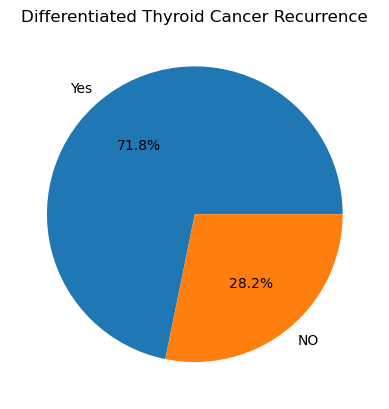

In [5]:
labels = ['Yes','NO']
plt.title('Differentiated Thyroid Cancer Recurrence')
plt.pie(df['Recurred'].value_counts(),labels=labels,autopct='%1.1f%%')

### Handeling Catagorical Variables

1. Gender
2.Smoking
3.Hx Smoking
4.Hx Radiothreapy

In [6]:
df['Gender'] = df['Gender'].map({'F':0, 'M':1})

In [7]:
df['Smoking'] = df['Smoking'].map({'No':0, 'Yes':1})

In [8]:
df['Hx Smoking'] = df['Hx Smoking'].map({'No':0, 'Yes':1})

In [9]:
df['Hx Radiothreapy'] = df['Hx Radiothreapy'].map({'No':0, 'Yes':1})

In [10]:
df.rename(columns = {'Physical Examination':'Physical_Examination','Hx Smoking':'Hx_Smoking','Hx Radiothreapy':'Hx_Radiothreapy','Thyroid Function':'Thyroid_Function','Physical Examination':'Physical_Examination'},inplace = True)

In [11]:
df['Focality'] = df['Focality'].map({'Uni-Focal':0, 'Multi-Focal':1})

In [12]:
df['Risk'].value_counts()

Low             249
Intermediate    102
High             32
Name: Risk, dtype: int64

In [13]:
df['T'].value_counts()

T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: T, dtype: int64

In [14]:
df['Pathology'] = df['Pathology'].map({'Micropapillary':0, 'Papillary':1, 'Follicular':2, 'Hurthel cell':3})

In [15]:
df['Risk'] = df['Risk'].map({'Low':0,'Intermediate':1,'High':2})

In [16]:
df['Thyroid_Function'] = df['Thyroid_Function'].map({'Euthyroid':0, 'Clinical Hyperthyroidism':1, 'Clinical Hypothyroidism':3,'Subclinical Hyperthyroidism':5, 'Subclinical Hypothyroidism':5})

### Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Physical_Examination'] = le.fit_transform(df['Physical_Examination'])
df['Physical_Examination'] = le.fit_transform(df['Physical_Examination'])

In [18]:
df['Adenopathy'] = le.fit_transform(df['Adenopathy'])

In [19]:
df

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,0,3,3,0,0,0,T1a,N0,M0,I,Indeterminate,No
1,34,0,0,1,0,0,1,3,0,0,0,T1a,N0,M0,I,Excellent,No
2,30,0,0,0,0,0,4,3,0,0,0,T1a,N0,M0,I,Excellent,No
3,62,0,0,0,0,0,4,3,0,0,0,T1a,N0,M0,I,Excellent,No
4,62,0,0,0,0,0,1,3,0,1,0,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,0,4,5,1,0,2,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,1,1,0,1,0,1,1,1,1,2,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,1,1,1,0,0,1,0,1,1,2,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,1,1,1,1,1,1,1,3,1,2,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [20]:
df['T'] = le.fit_transform(df['T'])
df['N'] = le.fit_transform(df['N'])
df['M'] = le.fit_transform(df['M'])
df['Stage'] = le.fit_transform(df['Stage'])
df['Response'] = le.fit_transform(df['Response'])
df['Recurred'] = le.fit_transform(df['Recurred'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   383 non-null    int64
 1   Gender                383 non-null    int64
 2   Smoking               383 non-null    int64
 3   Hx_Smoking            383 non-null    int64
 4   Hx_Radiothreapy       383 non-null    int64
 5   Thyroid_Function      383 non-null    int64
 6   Physical_Examination  383 non-null    int64
 7   Adenopathy            383 non-null    int32
 8   Pathology             383 non-null    int64
 9   Focality              383 non-null    int64
 10  Risk                  383 non-null    int64
 11  T                     383 non-null    int32
 12  N                     383 non-null    int32
 13  M                     383 non-null    int32
 14  Stage                 383 non-null    int32
 15  Response              383 non-null    int32
 16  Recurred

## Data Visualization

In [22]:
df['Gender'].value_counts()
data = {'Male': 71, 'Female': 312}



<BarContainer object of 2 artists>

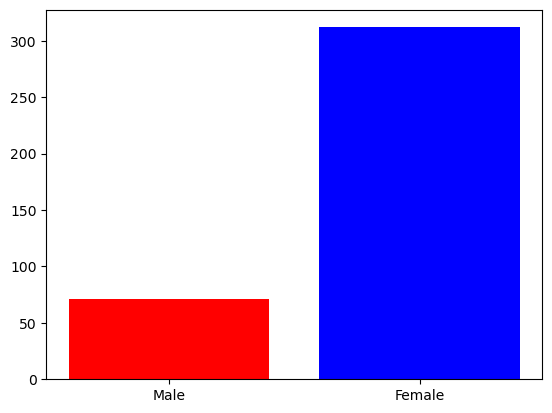

In [23]:
plt.bar(data.keys(),data.values(),color = ['r','b'])

Text(0, 0.5, 'Thyroid Cancer')

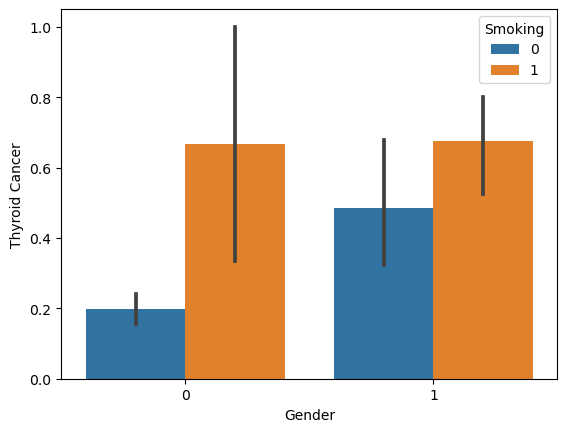

In [24]:
sns.barplot(x = df['Gender'], y = df['Recurred'],hue= df['Smoking'])
plt.ylabel("Thyroid Cancer")

#Observation male are more prone to Thyroid Cancer as men smoke more

In [25]:
df.Recurred.value_counts()

0    275
1    108
Name: Recurred, dtype: int64

In [26]:
df

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,0,3,3,0,0,0,0,0,0,0,2,0
1,34,0,0,1,0,0,1,3,0,0,0,0,0,0,0,1,0
2,30,0,0,0,0,0,4,3,0,0,0,0,0,0,0,1,0
3,62,0,0,0,0,0,4,3,0,0,0,0,0,0,0,1,0
4,62,0,0,0,0,0,1,3,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,0,4,5,1,0,2,6,2,1,4,0,1
379,81,1,1,0,1,0,1,1,1,1,2,6,2,1,4,3,1
380,72,1,1,1,0,0,1,0,1,1,2,6,2,1,4,3,1
381,61,1,1,1,1,1,1,1,3,1,2,6,2,0,3,3,1


In [28]:
df

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,0,3,3,0,0,0,0,0,0,0,2,0
1,34,0,0,1,0,0,1,3,0,0,0,0,0,0,0,1,0
2,30,0,0,0,0,0,4,3,0,0,0,0,0,0,0,1,0
3,62,0,0,0,0,0,4,3,0,0,0,0,0,0,0,1,0
4,62,0,0,0,0,0,1,3,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,0,4,5,1,0,2,6,2,1,4,0,1
379,81,1,1,0,1,0,1,1,1,1,2,6,2,1,4,3,1
380,72,1,1,1,0,0,1,0,1,1,2,6,2,1,4,3,1
381,61,1,1,1,1,1,1,1,3,1,2,6,2,0,3,3,1


In [30]:
y = df['Recurred']

In [31]:
X.drop('Recurred',axis = 1,inplace = True)

In [32]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<IPython.core.display.Javascript object>

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
log_reg_pred = log_reg.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
log_reg_acc = accuracy_score(y_test,log_reg_pred)
print(log_reg_acc)

0.8976377952755905


In [44]:
from sklearn.svm import SVC
svc_clf = SVC(gamma='auto')
svc_clf.fit(X = X_train,y = y_train)

SVC(gamma='auto')

In [46]:
svc_pred = svc_clf.predict(X_test)

In [48]:
svc_acc = accuracy_score(y_test,svc_pred)
print(svc_acc)

0.8976377952755905


In [50]:
from sklearn.tree import DecisionTreeClassifier
Dt  = DecisionTreeClassifier()
Dt.fit(X_train,y_train)
dt_pred = Dt.predict(X_test)

In [52]:
dt_acc = accuracy_score(y_test,dt_pred)
print(dt_acc)

0.9448818897637795


In [54]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,dt_pred,labels = Dt.classes_)

In [55]:
dm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Dt.classes_)

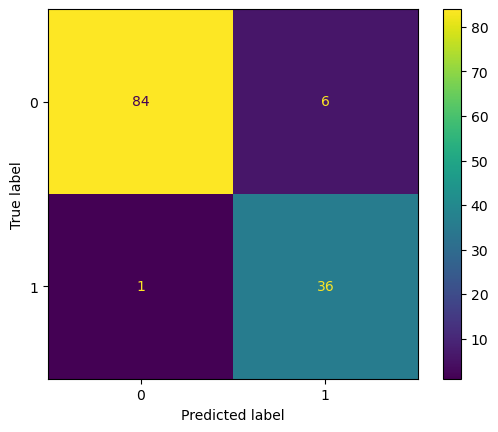

In [56]:
dm.plot()

In [57]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [58]:
Dt.fit(X_train,y_train)
dt_pred = Dt.predict(X_test)

In [59]:
dt_acc = accuracy_score(y_test,dt_pred)
print(dt_acc)

0.9291338582677166
